In [1]:
import pandas as pd

In [10]:
columns=["label", "time", "date", "query", "username", "text"]
df=pd.read_csv('data/training-1600000-processed-noemoticon.csv', names=columns)
df.head()

,label,time,date,query,username,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [11]:
df=df[['label', 'text']]
df['label']=df['label'].replace({4: 1})
df['label'].value_counts()

0    800000
1    800000
Name: label, dtype: int64

In [12]:
df=pd.concat([df[df['label']==0].sample(frac=.5), df[df['label']==1].sample(frac=.5)])
# df.to_csv('data/sample.csv', index=False)
df['label'].value_counts()

0    400000
1    400000
Name: label, dtype: int64

In [13]:
from nltk.tokenize import TweetTokenizer
tokenizer=TweetTokenizer(reduce_len=True)
data=[]
for text, label in zip(df['text'].values, df['label'].values): 
    data.append((tokenizer.tokenize(text.lower()), label))
data[0]

(["i'm",
  'not',
  'pleased',
  'about',
  'who',
  'won',
  'the',
  'apprentice',
  "don't",
  'like',
  'yasmina',
  '!'],
 0)

(array([3.46112e+05, 3.00894e+05, 1.49765e+05, 3.10900e+03, 6.60000e+01,
        3.30000e+01, 1.30000e+01, 4.00000e+00, 3.00000e+00, 1.00000e+00]),
 array([  1. ,  12.1,  23.2,  34.3,  45.4,  56.5,  67.6,  78.7,  89.8,
        100.9, 112. ]),
 <a list of 10 Patch objects>)

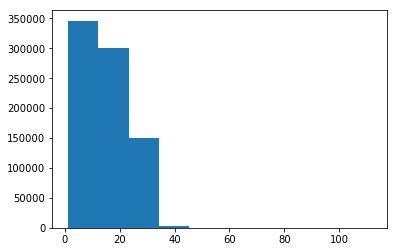

In [14]:
import matplotlib.pyplot as plt
length=[]
for text, label in data: 
    length.append(len(text))
plt.hist(length)

In [15]:
from nltk.tag import pos_tag
# pot_tags take a list of tokens
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

In [16]:
lemmatized_data=[]
for text, label in data: 
    lemmatized_tokens=[]
    for word, tag in pos_tag(text): 
        if tag.startswith('NN'): 
            pos='n'
        elif tag.startswith('VB'): 
            pos='v'
        else: 
            pos='a'
        lemmatized_tokens.append(lemmatizer.lemmatize(word, pos))
    lemmatized_data.append((lemmatized_tokens, label))
lemmatized_data[0]

(["i'm",
  'not',
  'pleased',
  'about',
  'who',
  'win',
  'the',
  'apprentice',
  "don't",
  'like',
  'yasmina',
  '!'],
 0)

In [17]:
from nltk.corpus import stopwords
stopwords_en=stopwords.words('english')

In [87]:
stopped_data=[]
for text, label in lemmatized_data: 
    stopped_tokens=[]
    for word in text: 
        if word not in stopwords_en: 
            stopped_tokens.append(word)
    stopped_data.append((stopped_tokens, label))
stopped_data[0]

(['@vivmondo',
  'haha',
  ',',
  'feel',
  'like',
  'win',
  'time',
  '.',
  'quarantine',
  'huge',
  'part',
  'house',
  '.',
  'could',
  'hear',
  'floor',
  '.'],
 0)

In [23]:
dict_data=[]
# for text, label in stopped_data: 
for text, label in lemmatized_data: 
    dict_tokens=dict([word, True] for word in text)
    dict_data.append((dict_tokens, label))
dict_data[0]

({"i'm": True,
  'not': True,
  'pleased': True,
  'about': True,
  'who': True,
  'win': True,
  'the': True,
  'apprentice': True,
  "don't": True,
  'like': True,
  'yasmina': True,
  '!': True},
 0)

In [ ]:
import random
random.Random().shuffle(dict_data)
train_set=int(len(dict_data)*0.9)
X_train=dict_data[:train_set]
X_test=dict_data[train_set:]

In [38]:
from nltk import classify
from nltk import NaiveBayesClassifier
clf=NaiveBayesClassifier.train(X_train)
print(f'Train Data Accuracy: {classify.accuracy(clf, X_train)}')
print(f'Train Data Accuracy: {classify.accuracy(clf, X_test)}')
print(clf.show_most_informative_features(10))

Train Data Accuracy: 0.8738222222222222
Train Data Accuracy: 0.762
Most Informative Features
                  Farrah = True                0 : 4      =     43.5 : 1.0
                     vip = True                4 : 0      =     36.9 : 1.0
                     SAD = True                0 : 4      =     33.1 : 1.0
                  sadden = True                0 : 4      =     28.2 : 1.0
                  Damnit = True                0 : 4      =     27.0 : 1.0
             heartbroken = True                0 : 4      =     27.0 : 1.0
                   whyyy = True                0 : 4      =     26.4 : 1.0
                  Bummer = True                0 : 4      =     25.7 : 1.0
                     447 = True                0 : 4      =     25.0 : 1.0
                    Booo = True                0 : 4      =     24.8 : 1.0
None


In [24]:
# train_set=int(len(stopped_data)*0.9)
# X_train=stopped_data[:train_set]
# X_test=stopped_data[train_set:]
train_set=int(len(lemmatized_data)*0.9)
X_train=lemmatized_data[:train_set]
X_test=lemmatized_data[train_set:]

In [25]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
tokenizer=Tokenizer()
tokenizer.fit_on_texts([text for text, label in X_train])
word_index=tokenizer.word_index

In [26]:
vocab_size=len(tokenizer.word_index)+1
print(f'Vocab Size: {vocab_size}')

Vocab Size: 409510


In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 40, 150)           61426500  
_________________________________________________________________
bidirectional_1 (Bidirection (None, 256)               285696    
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 514       
Total params: 61,712,710
Trainable params: 61,712,710
Non-trainable params: 0
_________________________________________________________________


In [27]:
y_train=[label for text, label in X_train]
y_test=[label for text, label in X_test]
X_train=pad_sequences(tokenizer.texts_to_sequences([' '.join(text) for text, label in X_train]), maxlen=40)
X_test=pad_sequences(tokenizer.texts_to_sequences([' '.join(text) for text, label in X_test]), maxlen=40)

In [29]:
from tensorflow.keras.utils import to_categorical
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [30]:
from keras.models import Sequential
from keras import layers
import time

In [31]:
current_time=time.time()
model=Sequential()
model.add(layers.Embedding(input_dim=vocab_size,output_dim=100,\
#                       input_length=30))
                      input_length=40))
model.add(layers.Bidirectional(layers.LSTM(128)))
model.add(layers.Dense(2,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',\
              metrics=['accuracy'])

model.fit(X_train,y_train,batch_size=256,epochs=5,validation_data=(X_test,y_test))
print(f'Time to train: {time.time()-current_time}')

Epoch 1/5
2813/2813 [==============================] - 2321s 818ms/step - loss: 0.4658 - accuracy: 0.7760 - val_loss: 0.5059 - val_accuracy: 0.7506
Epoch 2/5
2813/2813 [==============================] - 2282s 811ms/step - loss: 0.3577 - accuracy: 0.8418 - val_loss: 0.4992 - val_accuracy: 0.7574
Epoch 3/5
2813/2813 [==============================] - 2024s 719ms/step - loss: 0.3073 - accuracy: 0.8673 - val_loss: 0.4790 - val_accuracy: 0.7850
Epoch 4/5
2813/2813 [==============================] - 2526s 898ms/step - loss: 0.2604 - accuracy: 0.8894 - val_loss: 0.5146 - val_accuracy: 0.7823
Epoch 5/5
2813/2813 [==============================] - 2947s 1s/step - loss: 0.2188 - accuracy: 0.9069 - val_loss: 0.6522 - val_accuracy: 0.7530
Time to train: 12101.270072937012


In [32]:
current_time=time.time()
model=Sequential()
model.add(layers.Embedding(input_dim=vocab_size,output_dim=150,\
#                       input_length=30))
                      input_length=40))
model.add(layers.Bidirectional(layers.LSTM(128)))
model.add(layers.Dense(2,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',\
              metrics=['accuracy'])

model.fit(X_train,y_train,batch_size=256,epochs=5,validation_data=(X_test,y_test))
print(f'Time to train: {time.time()-current_time}')

Epoch 1/5
2813/2813 [==============================] - 2731s 969ms/step - loss: 0.4614 - accuracy: 0.7791 - val_loss: 0.5324 - val_accuracy: 0.7374
Epoch 2/5
2813/2813 [==============================] - 3333s 1s/step - loss: 0.3534 - accuracy: 0.8439 - val_loss: 0.4433 - val_accuracy: 0.7915
Epoch 3/5
2813/2813 [==============================] - 4162s 1s/step - loss: 0.2982 - accuracy: 0.8716 - val_loss: 0.5090 - val_accuracy: 0.7713
Epoch 4/5
2813/2813 [==============================] - 3974s 1s/step - loss: 0.2469 - accuracy: 0.8954 - val_loss: 0.4948 - val_accuracy: 0.7916
Epoch 5/5
2813/2813 [==============================] - 4656s 2s/step - loss: 0.2054 - accuracy: 0.9129 - val_loss: 0.5775 - val_accuracy: 0.7818
Time to train: 18858.250916957855


In [ ]:
y_train=[label for text, label in X_train]
y_test=[label for text, label in X_test]
X_train=pad_sequences(tokenizer.texts_to_sequences([' '.join(text) for text, label in X_train]), maxlen=30)
X_test=pad_sequences(tokenizer.texts_to_sequences([' '.join(text) for text, label in X_test]), maxlen=30)